<h1>Lesson 1. kNN on Iris dataset</h1>

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.</p>
<p>You can check the documentation <a href="http://scikit-learn.org/stable/datasets/index.html">here</a></p>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

<h3>Q.0.1 Print the object type of iris</h3>

In [4]:
# Put the command (or commands) here that would give the answer to the above question.
#TODO
type(iris)
# Iris is in the form of key-value pair dictionary y=f(X) where X data and y is target variables

sklearn.utils.Bunch

In [5]:
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


<h3>Q.0.2 What do the iris.target_names represent</h3>

In [12]:
# Describe what the iris.target_names represent
#TODO
# It represents classification of iris data set target label names into 3 flower sets 
target_names=list(iris.target_names)
for i in range(len(target_names)):
    print(i, target_names[i])


0 setosa
1 versicolor
2 virginica


In [13]:
print(list(iris.feature_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<h3>Q.0.3 What do the iris.feature_names represent</h3>

In [26]:
# Describe what the iris.feature_names represent
#TODO
# The iris.data is classified into the above feature names
iris_data=iris.data[1]
idlist=iris_data.tolist()
feature_name=list(iris.feature_names)
type(feature_name)
for i in range(len(feature_name)):
    print(feature_name[i], idlist[i])

sepal length (cm) 4.9
sepal width (cm) 3.0
petal length (cm) 1.4
petal width (cm) 0.2


In [27]:
# print the integers representing the species of each observation
print (iris.target)
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
data.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Q.1. How many observations are present for each species?</h3>

In [41]:
# Put the command (or commands) here that would give an answer to the above question.
#TODO
groupsCount=data.groupby('label').size()
groupsCount

label
0    50
1    50
2    50
dtype: int64

<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

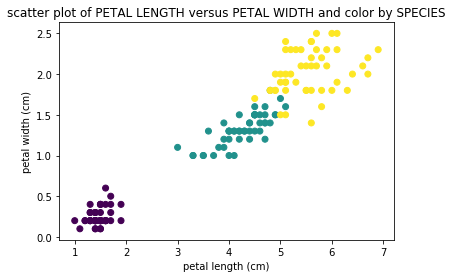

In [43]:
# Write the two plot commands here
#TODO
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# create a custom colormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(x=data['petal length (cm)'], y=data['petal width (cm)'],c=data['label'])
plt.title("scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()


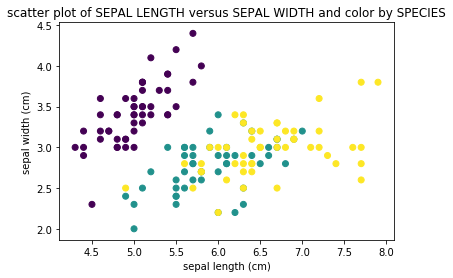

In [45]:
# # create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
plt.scatter(x=data['sepal length (cm)'],y= data['sepal width (cm)'],c=data['label'])
plt.title("scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

In [10]:
# Identify the plot that clearly separates the classes
#TODO
# scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES clearly classifies the flower species into three different groups. 

<br>
<p>After the initial exploratory data analysis.</p>

<h3>Q.4. Write the command to split the data into 70% train and 30% test, to prepare for k-NN modelling:</h3>

In [49]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

### <h3>Q.5. Write the Python command that performs k-NN fit using Petal.Width and Petal.Length only using 2 neighbors.</h3>

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
# Fitting the model
#TODO
knn.fit(X_train, y_train)
# Predicting the Test set results
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9555555555555556

<h3>Q.6. Evaluate your algorithm using the confusion_matrix and classification_report methods of the sklearn.metrics</h3>

In [56]:
# from sklearn.metrics import classification_report, confusion_matrix  

# print(confusion_matrix(#TODO, #TODO))  
# print(classification_report(#TODO, #TODO))
# print(accuracy_score(y_test, predictions))

In [57]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Text(0.5, 15.0, 'Predicted label')

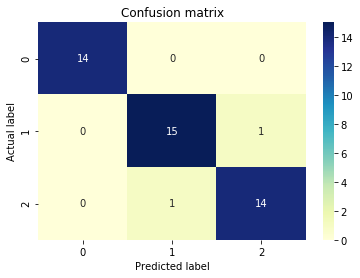

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>Q.7. What accuracy did you obtain?</h3>

In [60]:
knn.score(X_test, y_test)
# Accuracy of 95% is obtained for k=3

0.9555555555555556

<h3>Q.8. Try with different values of k (3 and 5), do you observe any difference in your result? Explain.</h3>

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)
# for k=5 accuracy of 97% is obtained

0.9777777777777777

<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

In [ ]:
# 1. Choosing the most applicable set of variables
# 2. Choosing an optimal value for k for kNN
# 3. Not overfitting the data in general


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# Add your response here
# In this assignmnet we made use of iris data set which is present in the database of sckit learn. It would be good expereience if the data was real time. Is the data modeling in real time same as the data set in iris.
# The data set was already cleaned so it helped us to analyze the data easly. I hope to get some experience working with unclean data set
# Iris data set was small so it was easy for analysis